In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn-details-of-customer/Telco-Customer-Churn.csv


In [3]:
df = pd.read_csv('/kaggle/input/telecom-churn-details-of-customer/Telco-Customer-Churn.csv')
df 

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7027          Yes               Yes             DSL            Yes  ...   
7028          Yes               Yes     Fiber optic             No  ...   
7029           No  No phone service             DSL            Yes  ...   
7030          Yes               Yes     Fiber optic             No  ...   
7031          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7027              Yes         Yes         Yes             Yes        One year   
7028              Yes          No         Yes             Yes        One year   
7029               No          No          No              No  Month-to-month   
7030               No          No          No              No  Month-to-month   
7031              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7027              Yes               Mailed check          84.80       1990.50   
7028              Yes    Credit card (automatic)         103.20       7362.90   
7029              Yes           Electronic check          29.60        346.45   
7030              Yes               Mailed check          74.40        306.60   
7031              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7027     No  
7028     No  
7029     No  
7030    Yes  
7031     No  

[7032 rows x 21 columns]

### Data check

checking non-null values in our dataset

In [4]:
df.info()
# no null values are there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

## Exploratory Data Analysis

#### General Feature Exploration

In [6]:
# displaying Nan values per column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

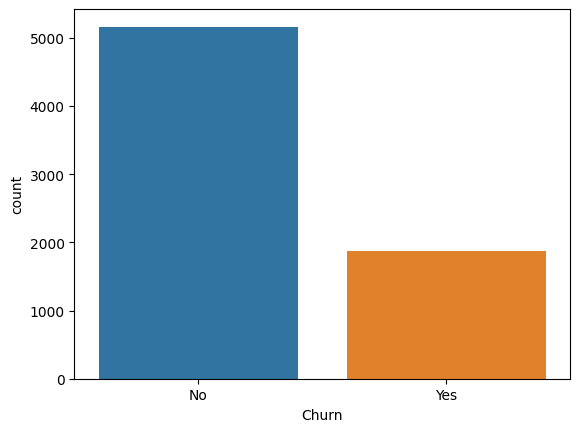

In [7]:
# finding the balance of the class labels --> churn using count plot
sns.countplot(data=df,x='Churn')

In [8]:
# Printing the churn in values
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='TotalCharges'>

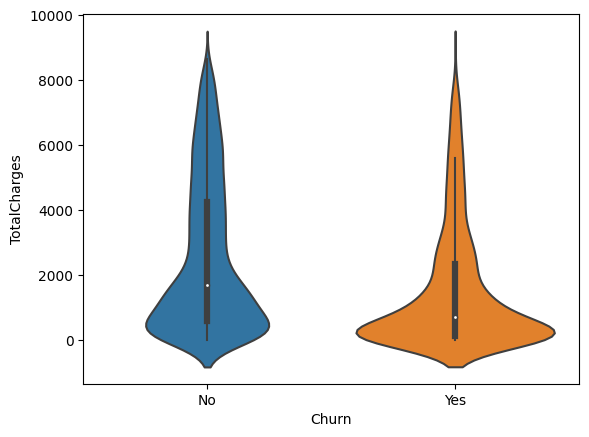

In [9]:
# distribution of total charges between churn categories 
# displayed using a box plot and violin plot

sns.violinplot(data=df,x='Churn',y='TotalCharges')

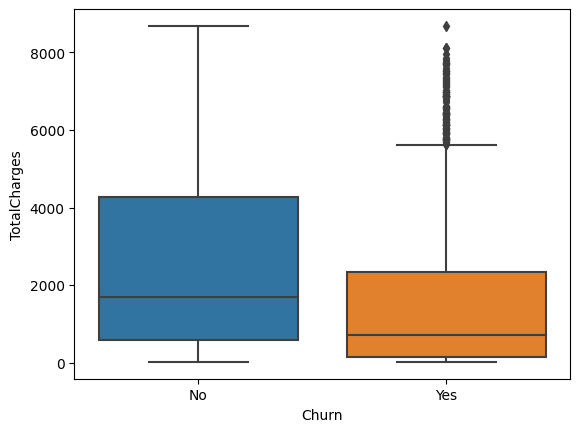

In [10]:
sns.boxplot(data=df,x='Churn',y='TotalCharges');

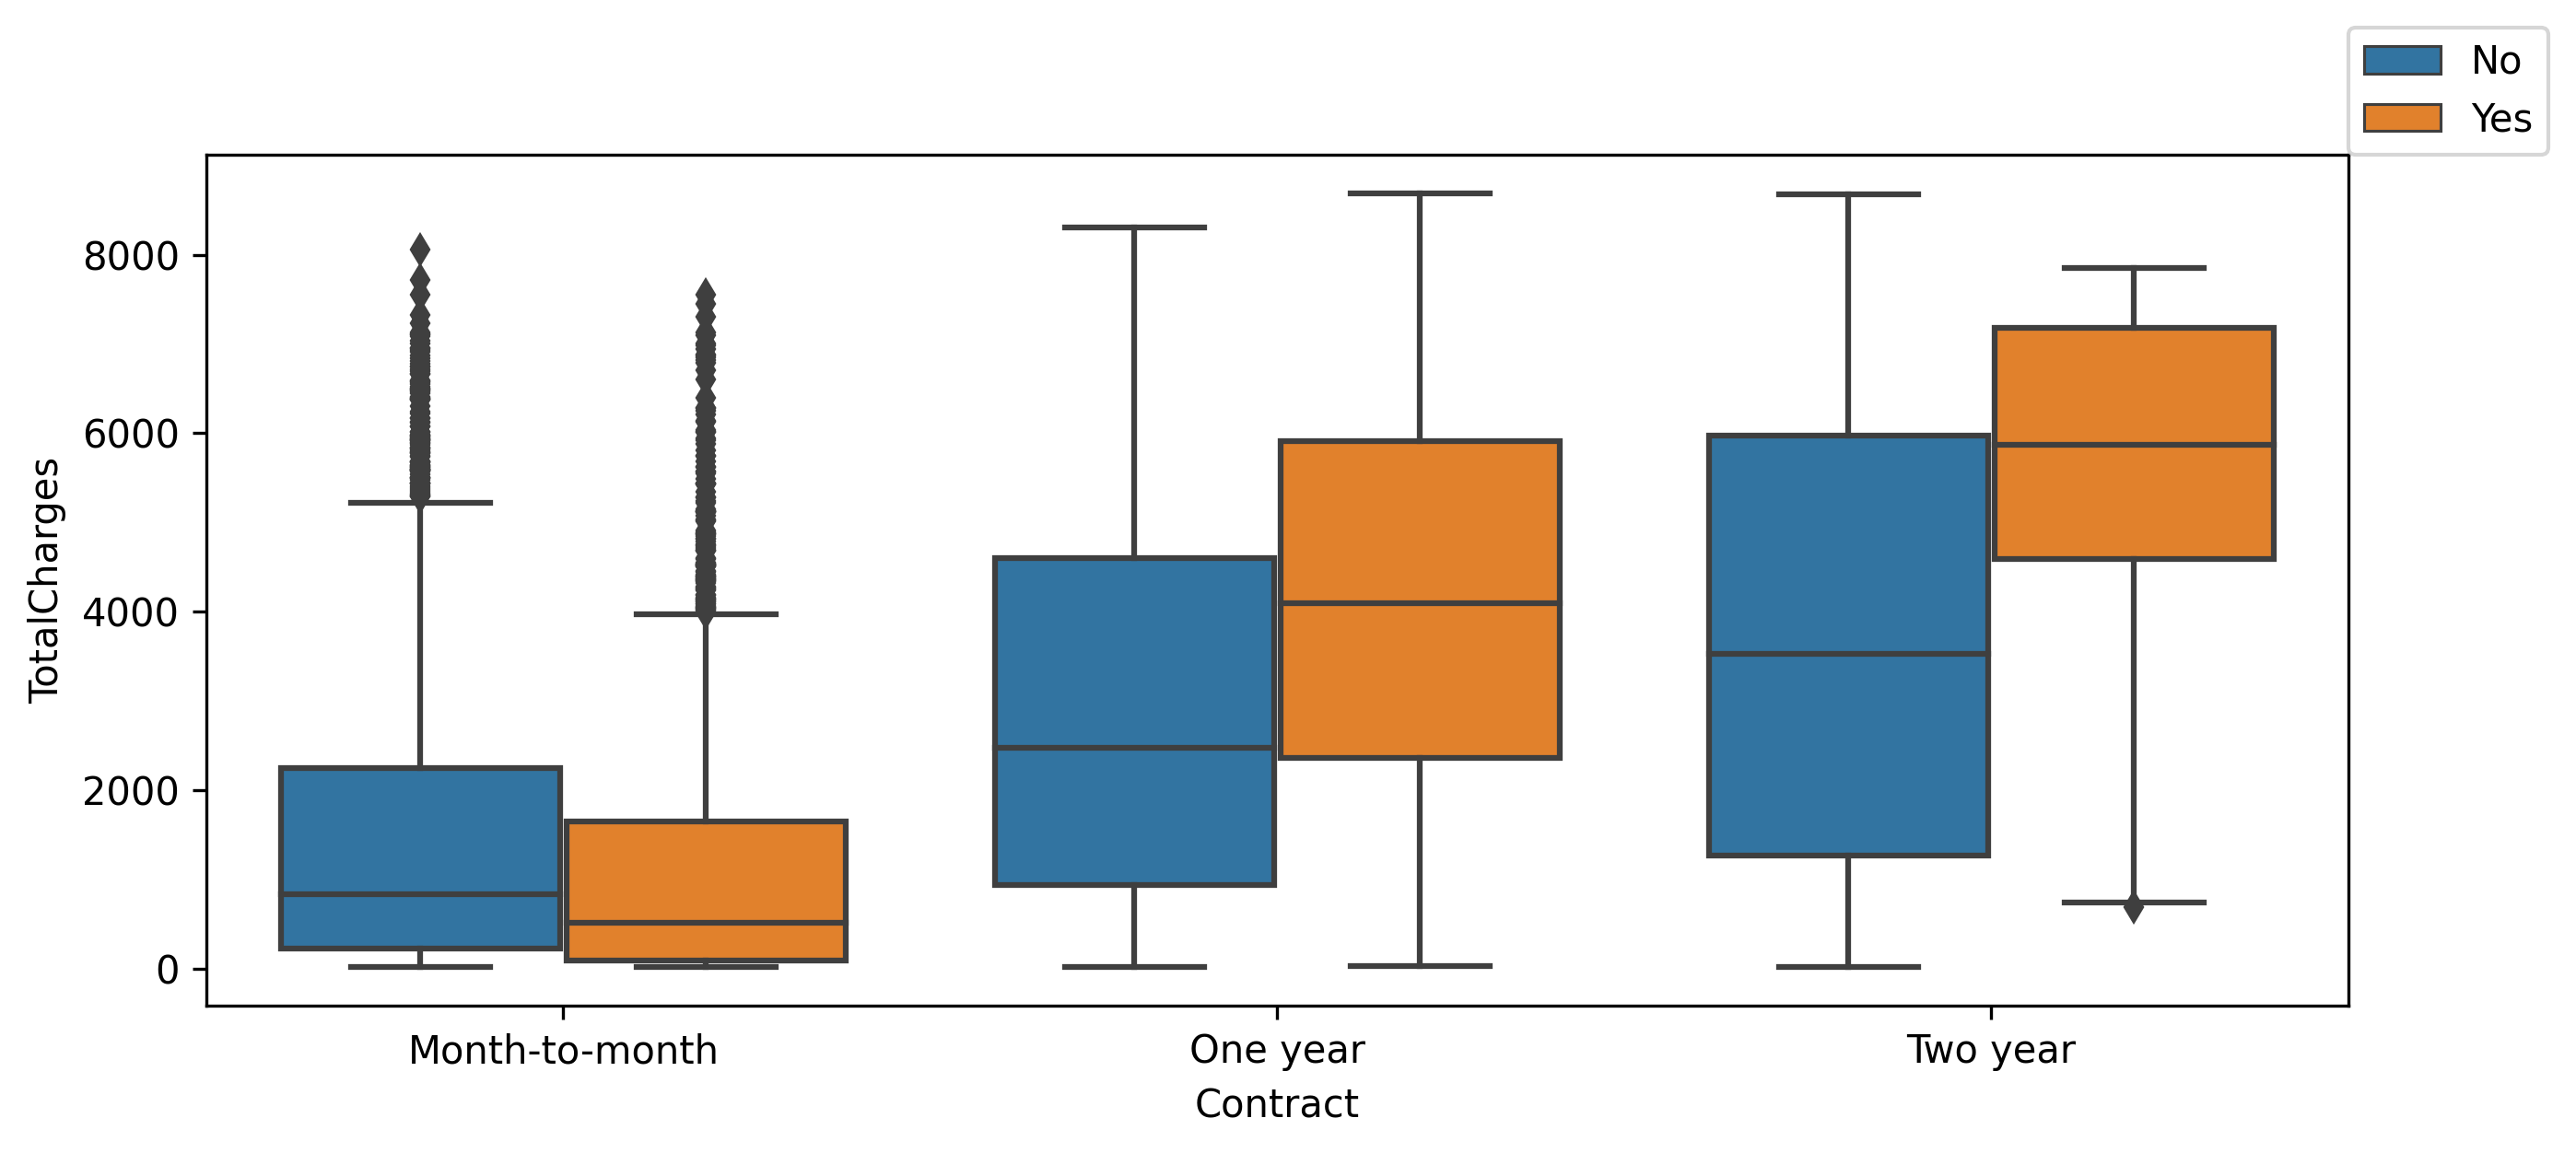

In [11]:
#  displaying the distrubution of TotalCharges per Contract type in box plot
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn');
plt.legend(loc=(1,1))

In [12]:
 # setting up dummy variables for categorical features
pd.get_dummies(df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','InternetService','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']])


SeniorCitizen  gender_Female  gender_Male  Partner_No  Partner_Yes  \
0                 0           True        False       False         True   
1                 0          False         True        True        False   
2                 0          False         True        True        False   
3                 0          False         True        True        False   
4                 0           True        False        True        False   
...             ...            ...          ...         ...          ...   
7027              0          False         True       False         True   
7028              0           True        False       False         True   
7029              0           True        False       False         True   
7030              1          False         True       False         True   
7031              0          False         True        True        False   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0              True           False             True             False   
1              True           False            False              True   
2              True           False            False              True   
3              True           False             True             False   
4              True           False            False              True   
...             ...             ...              ...               ...   
7027          False            True            False              True   
7028          False            True            False              True   
7029          False            True             True             False   
7030           True           False            False              True   
7031           True           False            False              True   

      MultipleLines_No  ...  Contract_One year  Contract_Two year  \
0                False  ...              False              False   
1                 True  ...               True              False   
2                 True  ...              False              False   
3                False  ...               True              False   
4                 True  ...              False              False   
...                ...  ...                ...                ...   
7027             False  ...               True              False   
7028             False  ...               True              False   
7029             False  ...              False              False   
7030             False  ...              False              False   
7031              True  ...              False               True   

      PaperlessBilling_No  PaperlessBilling_Yes  \
0                   False                  True   
1                    True                 False   
2                   False                  True   
3                    True                 False   
4                   False                  True   
...                   ...                   ...   
7027                False                  True   
7028                False                  True   
7029                False                  True   
7030                False                  True   
7031                False                  True   

      PaymentMethod_Bank transfer (automatic)  \
0                                       False   
1                                       False   
2                                       False   
3                                        True   
4                                       False   
...                                       ...   
7027                                    False   
7028                                    False   
7029                                    False   
7030                                    False   
7031                                     True   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                     False                            True   
1              

In [13]:
# to find the correlation between all features
corr_df = pd.get_dummies(df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','InternetService','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]).corr()


In [14]:
corr_df

SeniorCitizen  gender_Female  \
SeniorCitizen                                 1.000000       0.001819   
gender_Female                                 0.001819       1.000000   
gender_Male                                  -0.001819      -1.000000   
Partner_No                                   -0.016957      -0.001379   
Partner_Yes                                   0.016957       0.001379   
Dependents_No                                 0.210550       0.010349   
Dependents_Yes                               -0.210550      -0.010349   
PhoneService_No                              -0.008392      -0.007515   
PhoneService_Yes                              0.008392       0.007515   
MultipleLines_No                             -0.136377      -0.004335   
MultipleLines_No phone service               -0.008392      -0.007515   
MultipleLines_Yes                             0.142996       0.008883   
OnlineSecurity_No                             0.185145      -0.010859   
OnlineSecurity_No internet service           -0.182519      -0.004745   
OnlineSecurity_Yes                           -0.038576       0.016328   
OnlineBackup_No                               0.087539      -0.008605   
OnlineBackup_No internet service             -0.182519      -0.004745   
OnlineBackup_Yes                              0.066663       0.013093   
DeviceProtection_No                           0.094403       0.003163   
DeviceProtection_No internet service         -0.182519      -0.004745   
DeviceProtection_Yes                          0.059514       0.000807   
TechSupport_No                                0.205254      -0.003815   
TechSupport_No internet service              -0.182519      -0.004745   
TechSupport_Yes                              -0.060577       0.008507   
InternetService_DSL                          -0.108276      -0.007584   
InternetService_Fiber optic                   0.254923       0.011189   
InternetService_No                           -0.182519      -0.004745   
StreamingTV_No                                0.048664      -0.003088   
StreamingTV_No internet service              -0.182519      -0.004745   
StreamingTV_Yes                               0.105445       0.007124   
StreamingMovies_No                            0.034196      -0.006078   
StreamingMovies_No internet service          -0.182519      -0.004745   
StreamingMovies_Yes                           0.119842       0.010105   
Contract_Month-to-month                       0.137752       0.003251   
Contract_One year                            -0.046491      -0.007755   
Contract_Two year                            -0.116205       0.003603   
PaperlessBilling_No                          -0.156258      -0.011902   
PaperlessBilling_Yes                          0.156258       0.011902   
PaymentMethod_Bank transfer (automatic)      -0.016235       0.015973   
PaymentMethod_Credit card (automatic)        -0.024359      -0.001632   
PaymentMethod_Electronic check                0.171322      -0.000844   
PaymentMethod_Mailed check                   -0.152987      -0.013199   
Churn_No                                     -0.150541      -0.008545   
Churn_Yes                                     0.150541       0.008545   

                                         gender_Male  Partner_No  Partner_Yes  \
SeniorCitizen                              -0.001819   -0.016957     0.016957   
gender_Female                              -1.000000   -0.001379     0.001379   
gender_Male                                 1.000000    0.001379    -0.001379   
Partner_No                                  0.001379    1.000000    -1.000000   
Partner_Yes                                -0.001379   -1.000000     1.000000   
Dependents_No                              -0.010349    0.452269    -0.452269   
Dependents_Yes                              0.010349   -0.452269     0.452269   
PhoneService_No                             0.007515    0.018397    -0.018397   
PhoneService_Yes          

In [15]:
# how this features are correlated to churn
corr_df['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

In [16]:
# first row and last row doesnot make any sense
# as we are making the correlation for the same feature
# so we are removing both the rows

corr_yes_chur = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

In [17]:
corr_yes_chur

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

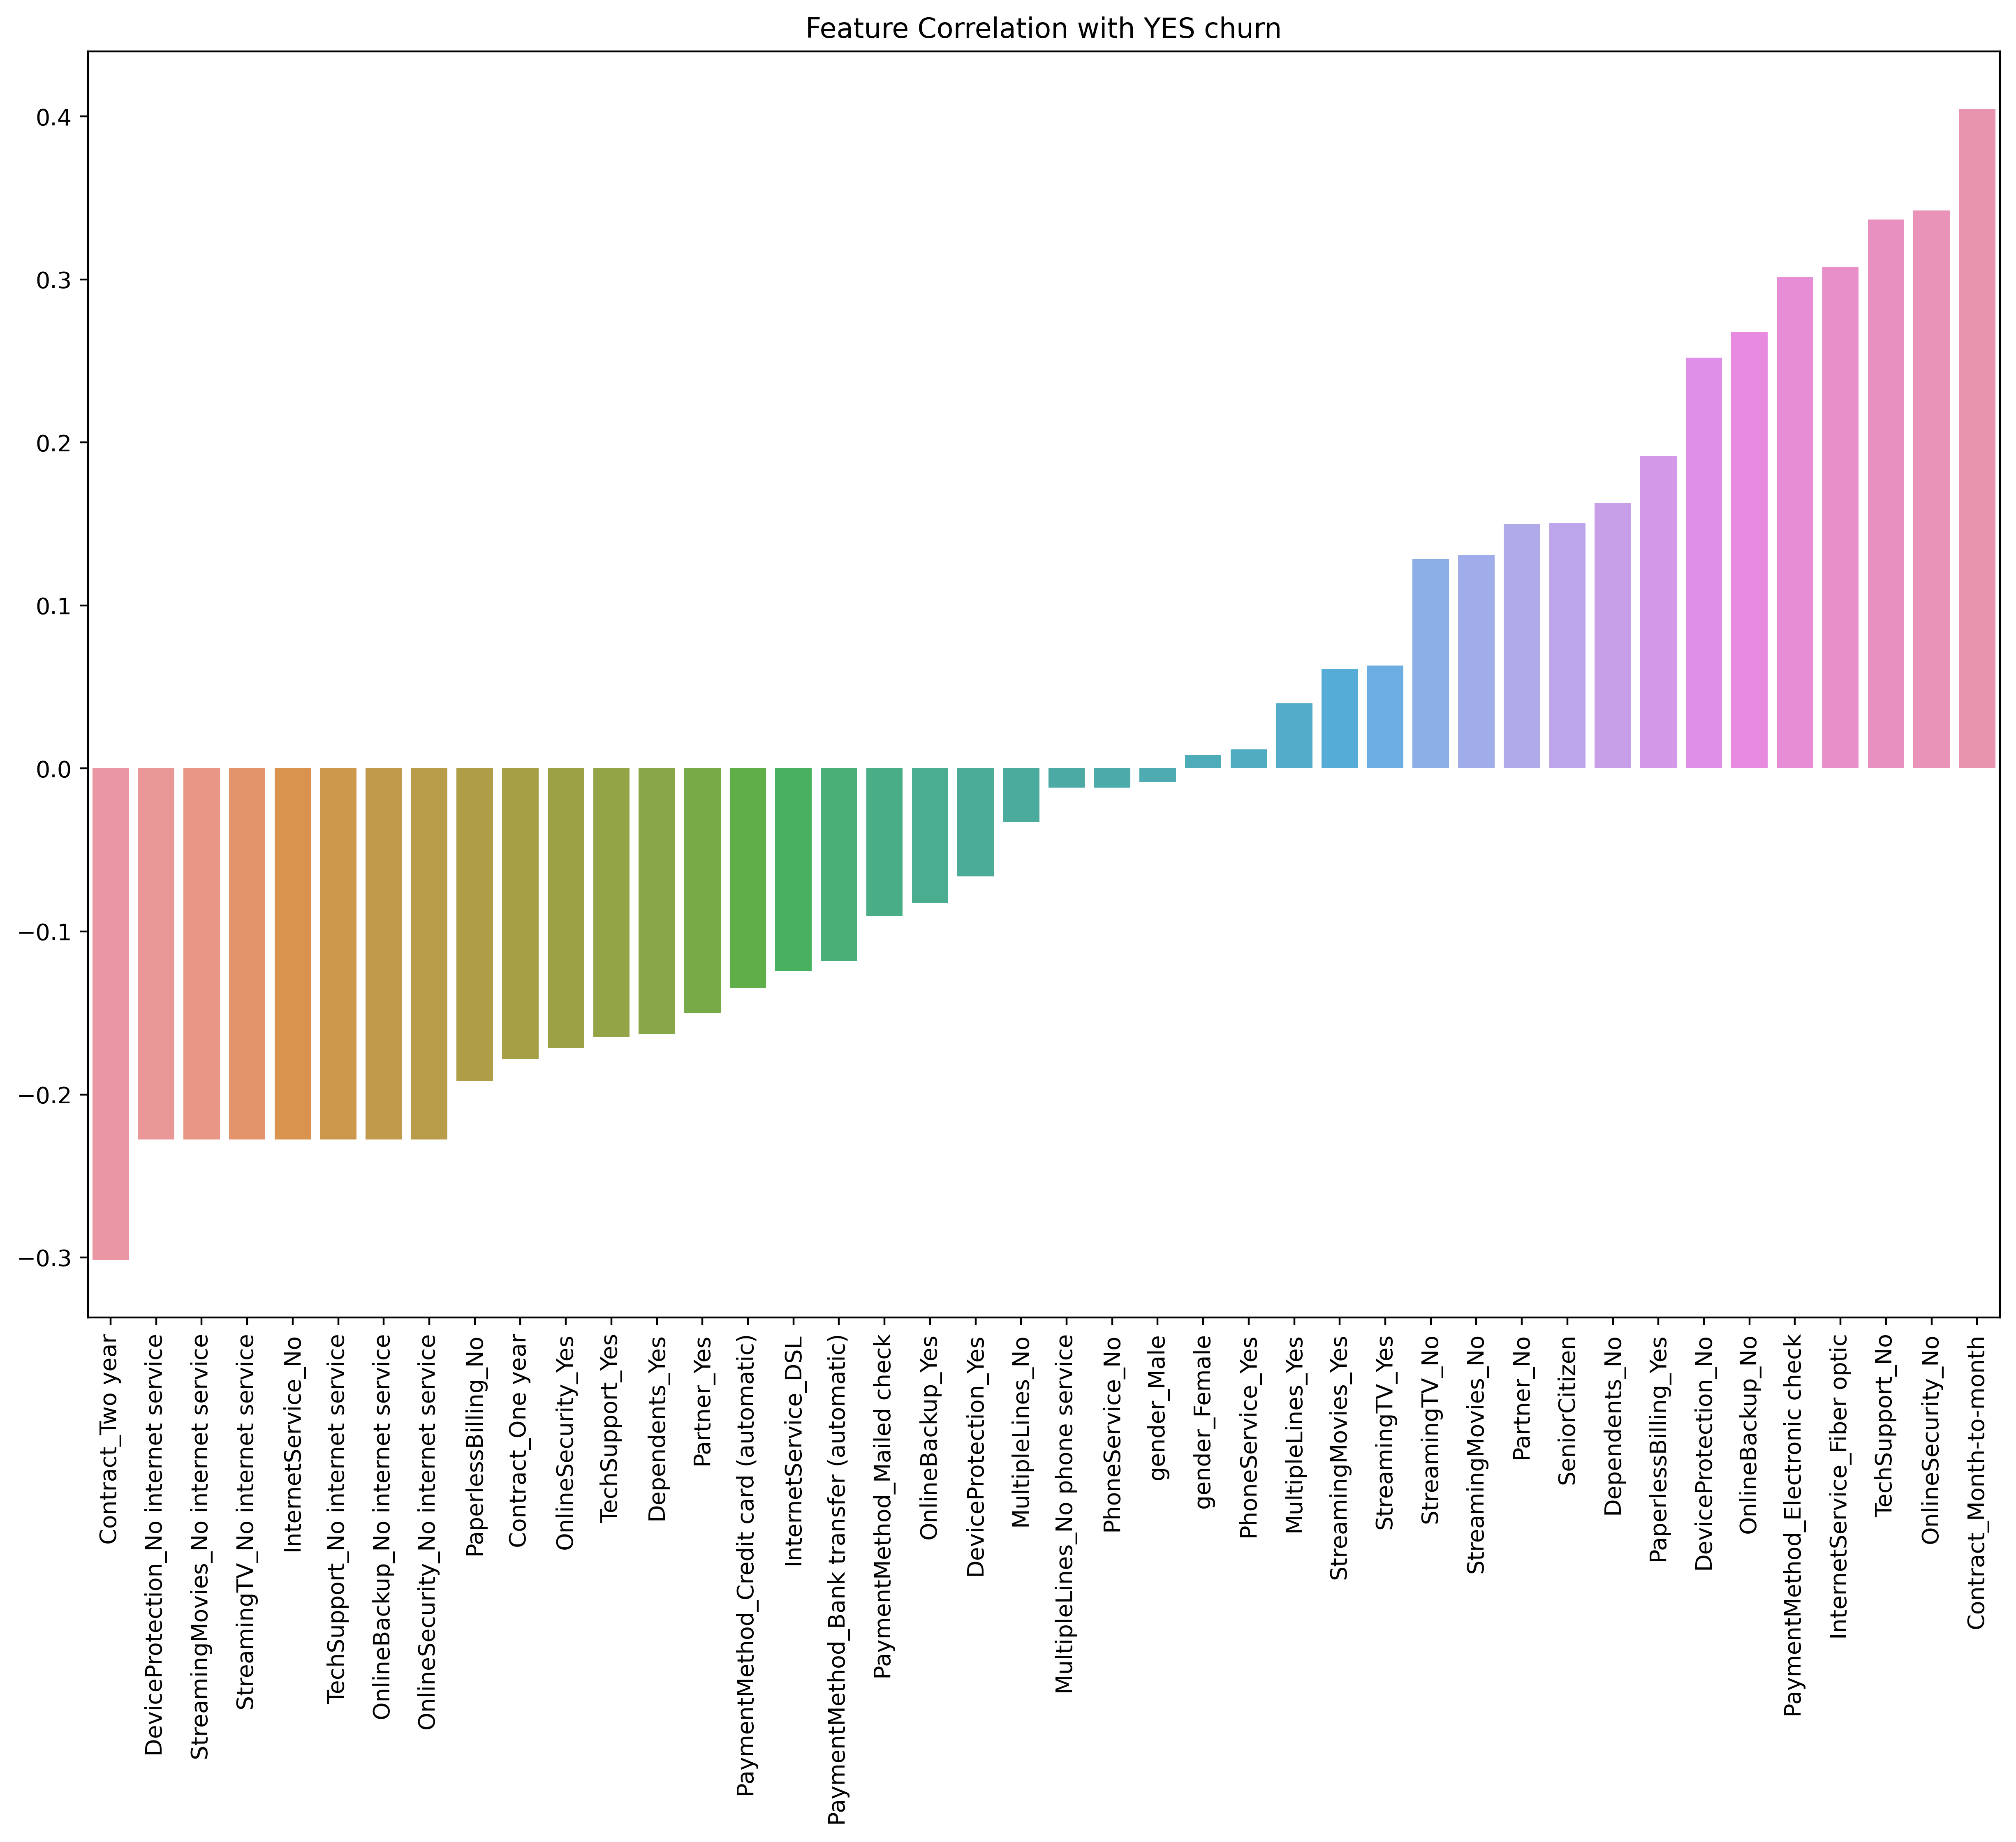

In [18]:
# now using a barplot for visulalizing the correlation of features
plt.figure(figsize=(15,10),dpi=400)
plt.title('Feature Correlation with YES churn')
sns.barplot(x=corr_yes_chur.index,y=corr_yes_chur.values)
plt.xticks(rotation=90);

## Churn Analysis

In [19]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tenure', ylabel='Count'>

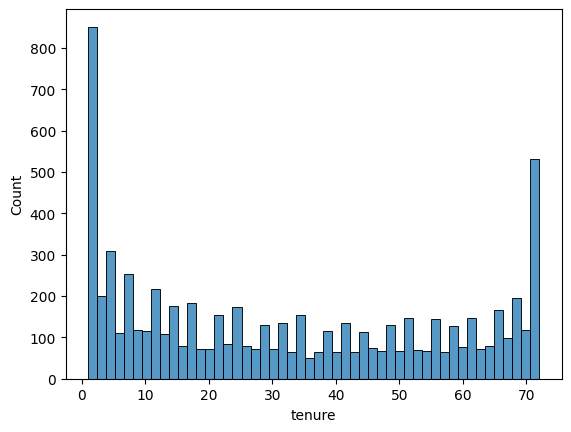

In [20]:
sns.histplot(data=df,x='tenure',bins=50)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


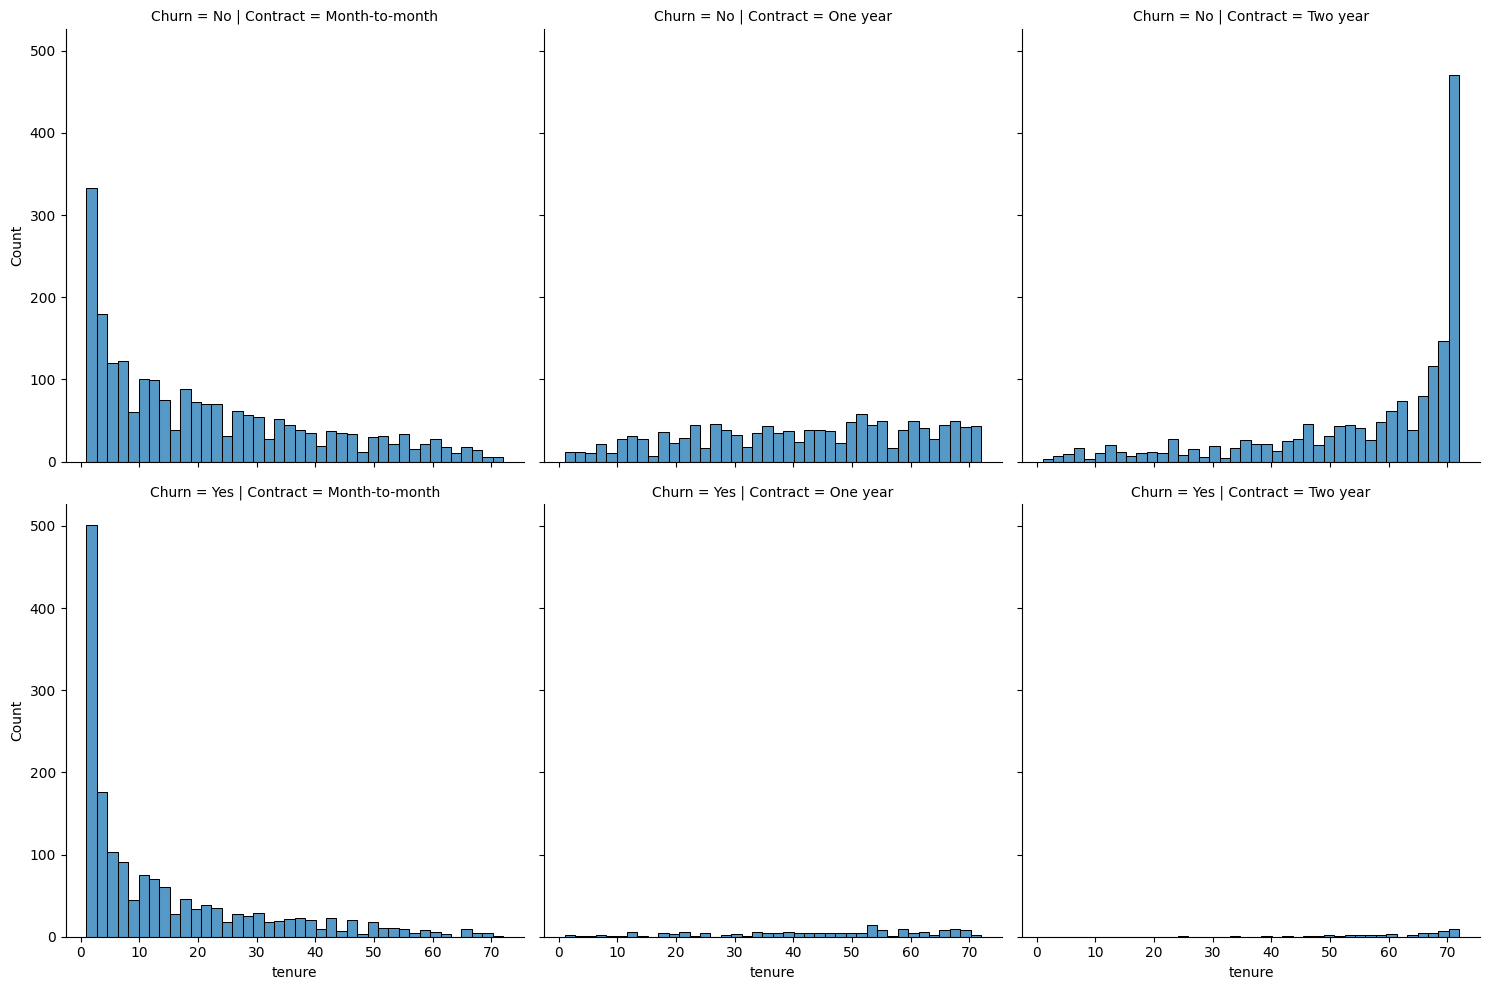

In [21]:
sns.displot(data=df,x='tenure',col='Contract',row='Churn',bins=40)

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

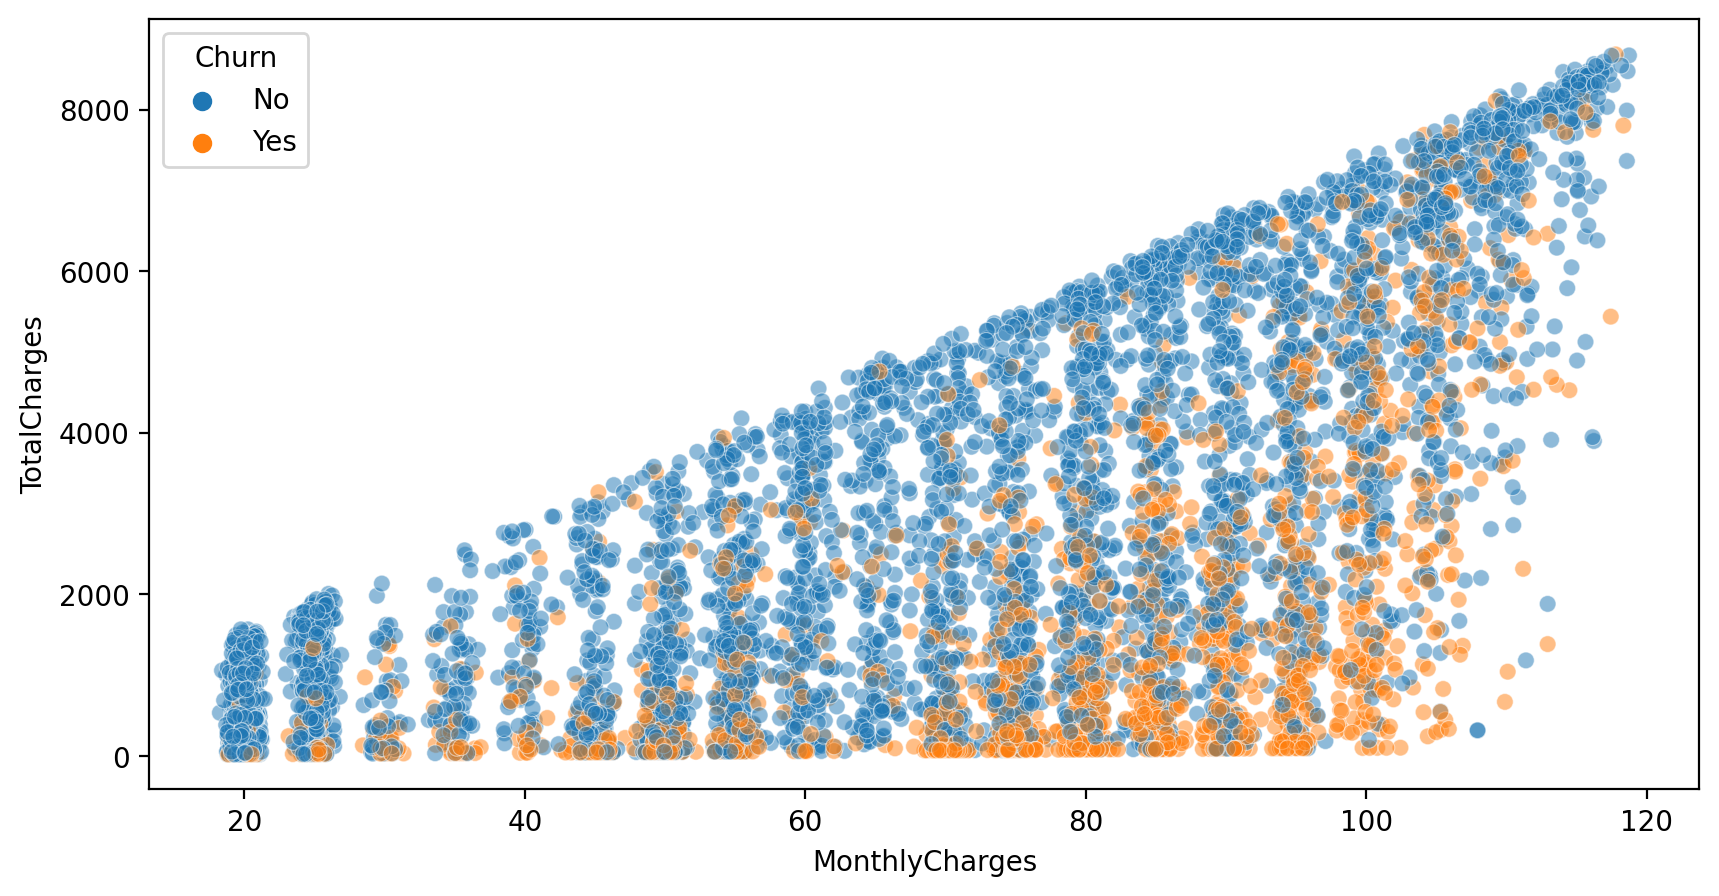

In [22]:
# displaying a scatter plot for total Charges vs Monthly charges
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',
               alpha=0.5,linewidth=0.4)

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

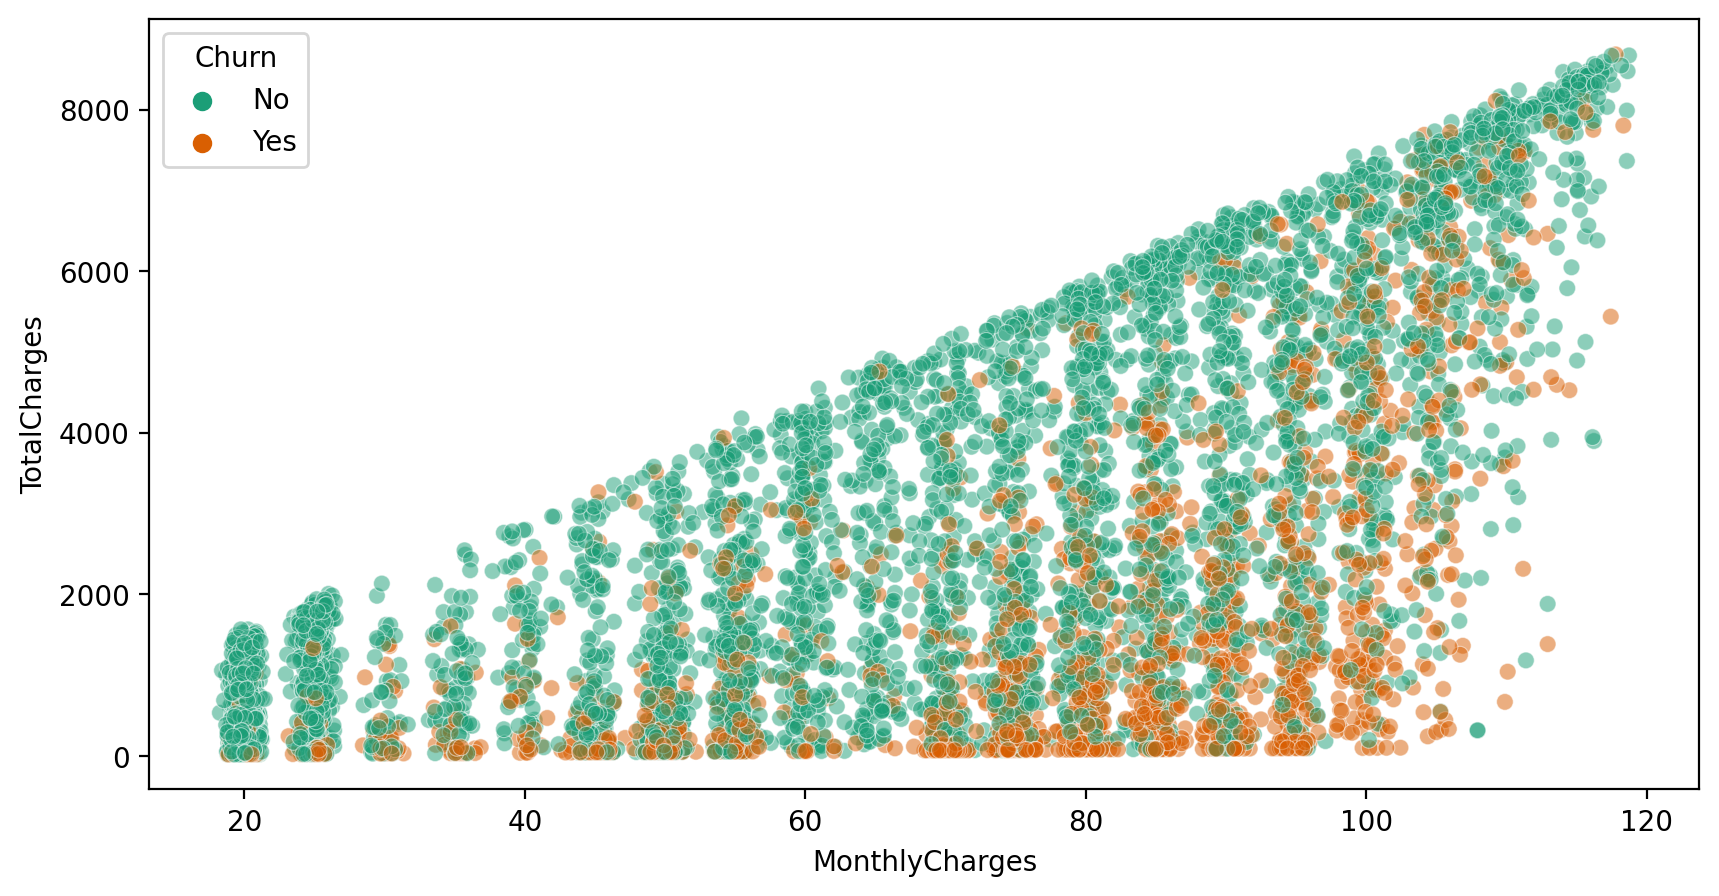

In [23]:
# displaying a scatter plot for total Charges vs Monthly charges
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',
               alpha=0.5,linewidth=0.4,palette='Dark2')

### Creating Cohorts based on Tenure

In [24]:
# each tenure length will be considered as one cohort
# 1month to n months
# creating cohorts for 1 to 72 months

In [25]:
yes_churn = df.groupby(['Churn','tenure'])

In [26]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [27]:
yes_churn

tenure             1    2   3   4   5   6   7   8   9   10  ...  63  64  65  \
customerID        380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
gender            380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
SeniorCitizen     380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
Partner           380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
Dependents        380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
PhoneService      380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
MultipleLines     380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
InternetService   380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
OnlineSecurity    380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
OnlineBackup      380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
DeviceProtection  380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
TechSupport       380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
StreamingTV       380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
StreamingMovies   380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
Contract          380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
PaperlessBilling  380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
PaymentMethod     380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
MonthlyCharges    380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
TotalCharges      380  123  94  83  64  40  51  42  46  45  ...   4   4   9   

tenure            66  67  68  69  70  71  72  
customerID        13  10   9   8  11   6   6  
gender            13  10   9   8  11   6   6  
SeniorCitizen     13  10   9   8  11   6   6  
Partner           13  10   9   8  11   6   6  
Dependents        13  10   9   8  11   6   6  
PhoneService      13  10   9   8  11   6   6  
MultipleLines     13  10   9   8  11   6   6  
InternetService   13  10   9   8  11   6   6  
OnlineSecurity    13  10   9   8  11   6   6  
OnlineBackup      13  10   9   8  11   6   6  
DeviceProtection  13  10   9   8  11   6   6  
TechSupport       13  10   9   8  11   6   6  
StreamingTV       13  10   9   8  11   6   6  
StreamingMovies   13  10   9   8  11   6   6  
Contract          13  10   9   8  11   6   6  
PaperlessBilling  13  10   9   8  11   6   6  
PaymentMethod     13  10   9   8  11   6   6  
MonthlyCharges    13  10   9   8  11   6   6  
TotalCharges      13  10   9   8  11   6   6  

[19 rows x 72 columns]

In [28]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [29]:
no_churn

tenure             1    2    3   4   5   6   7   8   9   10  ...  63  64  65  \
customerID        233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
gender            233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Partner           233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Dependents        233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PhoneService      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
MultipleLines     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
InternetService   233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
TechSupport       233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
StreamingTV       233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Contract          233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
TotalCharges      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   

tenure            66  67  68  69   70   71   72  
customerID        76  88  91  87  108  164  356  
gender            76  88  91  87  108  164  356  
SeniorCitizen     76  88  91  87  108  164  356  
Partner           76  88  91  87  108  164  356  
Dependents        76  88  91  87  108  164  356  
PhoneService      76  88  91  87  108  164  356  
MultipleLines     76  88  91  87  108  164  356  
InternetService   76  88  91  87  108  164  356  
OnlineSecurity    76  88  91  87  108  164  356  
OnlineBackup      76  88  91  87  108  164  356  
DeviceProtection  76  88  91  87  108  164  356  
TechSupport       76  88  91  87  108  164  356  
StreamingTV       76  88  91  87  108  164  356  
StreamingMovies   76  88  91  87  108  164  356  
Contract          76  88  91  87  108  164  356  
PaperlessBilling  76  88  91  87  108  164  356  
PaymentMethod     76  88  91  87  108  164  356  
MonthlyCharges    76  88  91  87  108  164  356  
TotalCharges      76  88  91  87  108  164  356  

[19 rows x 72 columns]

In [30]:
# finding the churn rate
# yes_churn / (total churn)

churn_rate = 100*yes_churn/(no_churn+yes_churn)

In [31]:
a = churn_rate.transpose()['customerID']

<Axes: xlabel='tenure'>

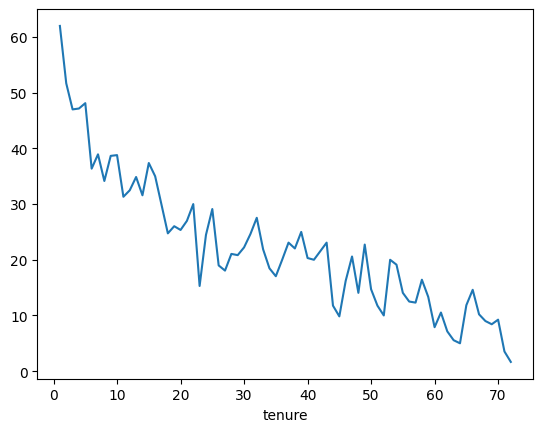

In [32]:
a.plot()

In [33]:
a.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72],
      dtype='int64', name='tenure')

In [34]:
a.values

array([61.99021207, 51.68067227, 47.        , 47.15909091, 48.12030075,
       36.36363636, 38.93129771, 34.14634146, 38.65546218, 38.79310345,
       31.31313131, 32.47863248, 34.86238532, 31.57894737, 37.37373737,
       35.        , 29.88505747, 24.74226804, 26.02739726, 25.35211268,
       26.98412698, 30.        , 15.29411765, 24.46808511, 29.11392405,
       18.98734177, 18.05555556, 21.05263158, 20.83333333, 22.22222222,
       24.61538462, 27.53623188, 21.875     , 18.46153846, 17.04545455,
       20.        , 23.07692308, 22.03389831, 25.        , 20.3125    ,
       20.        , 21.53846154, 23.07692308, 11.76470588,  9.83606557,
       16.21621622, 20.58823529, 14.0625    , 22.72727273, 14.70588235,
       11.76470588, 10.        , 20.        , 19.11764706, 14.0625    ,
       12.5       , 12.30769231, 16.41791045, 13.33333333,  7.89473684,
       10.52631579,  7.14285714,  5.55555556,  5.        , 11.84210526,
       14.60674157, 10.20408163,  9.        ,  8.42105263,  9.24

## Broader Cohort Groups

0-12 months
12-24 months
24-48 months
over 48 months

In [35]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure <25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else: 
        return 'Over 48 Months'

In [36]:
df['tenure'].apply(cohort)

0          0-12 Months
1         24-48 Months
2          0-12 Months
3         24-48 Months
4          0-12 Months
             ...      
7027      12-24 Months
7028    Over 48 Months
7029       0-12 Months
7030       0-12 Months
7031    Over 48 Months
Name: tenure, Length: 7032, dtype: object

In [37]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [38]:
df[['Tenure Cohort','tenure']]

Tenure Cohort  tenure
0        0-12 Months       1
1       24-48 Months      34
2        0-12 Months       2
3       24-48 Months      45
4        0-12 Months       2
...              ...     ...
7027    12-24 Months      24
7028  Over 48 Months      72
7029     0-12 Months      11
7030     0-12 Months       4
7031  Over 48 Months      66

[7032 rows x 2 columns]

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

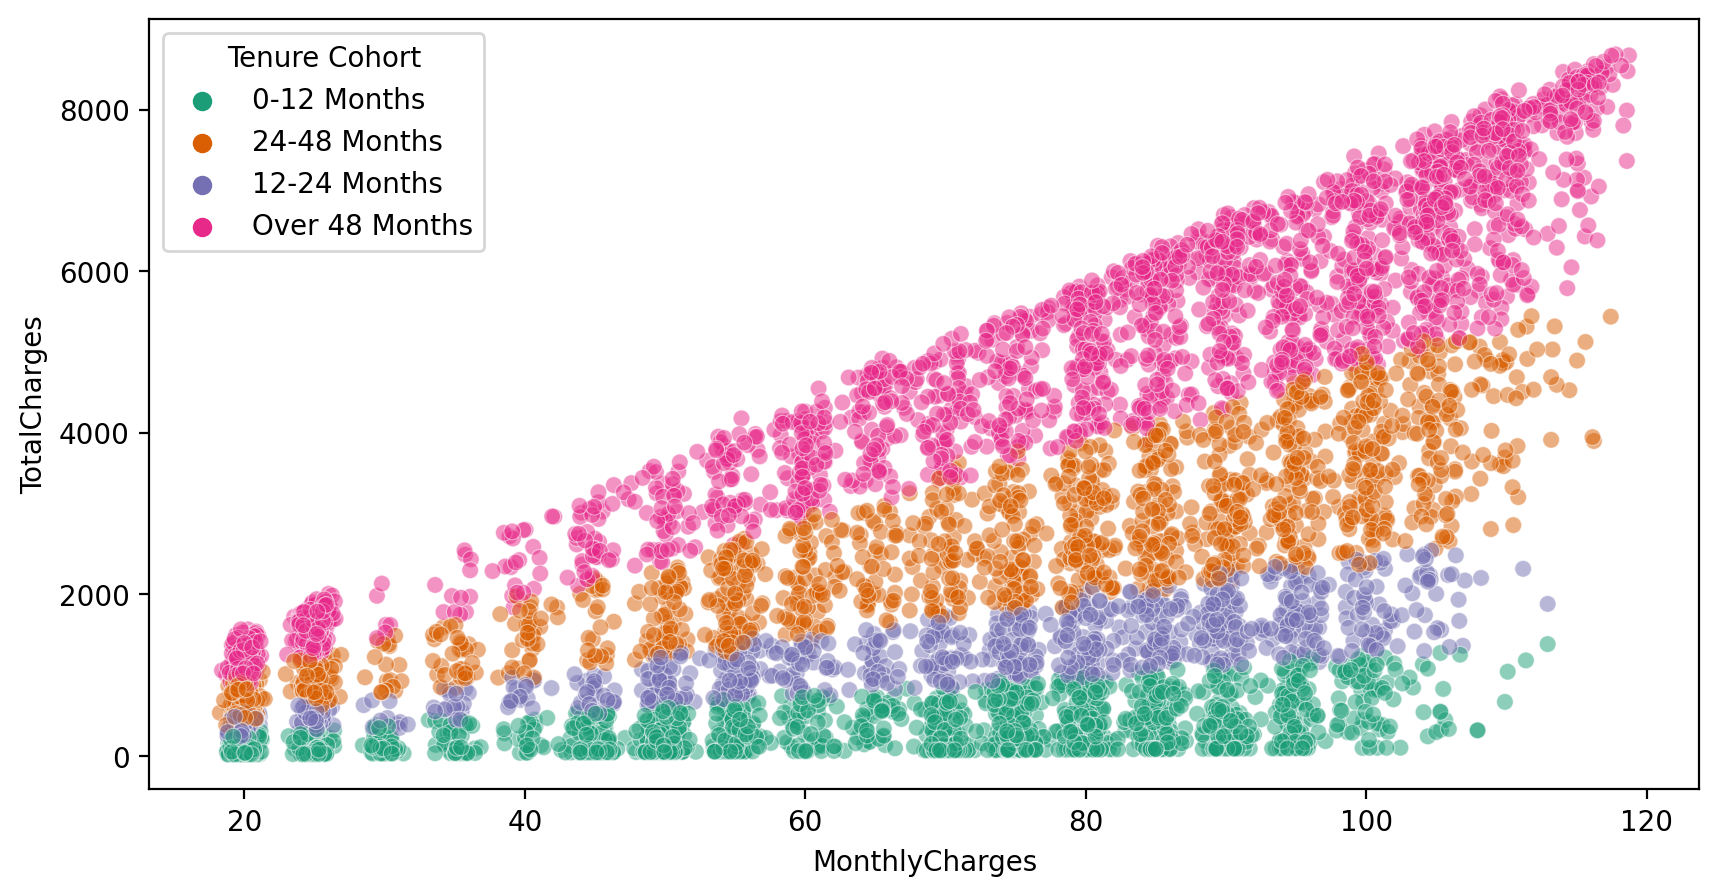

In [39]:
# displaying a scatter plot for total Charges vs Monthly charges
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',
               alpha=0.5,linewidth=0.4,palette='Dark2')

<Axes: xlabel='Tenure Cohort', ylabel='count'>

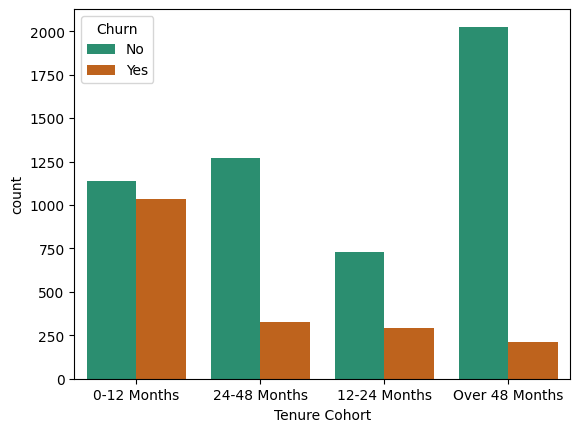

In [40]:
# creating a countplot for churn per cohort
sns.countplot(data = df, x='Tenure Cohort',hue='Churn',palette='Dark2')

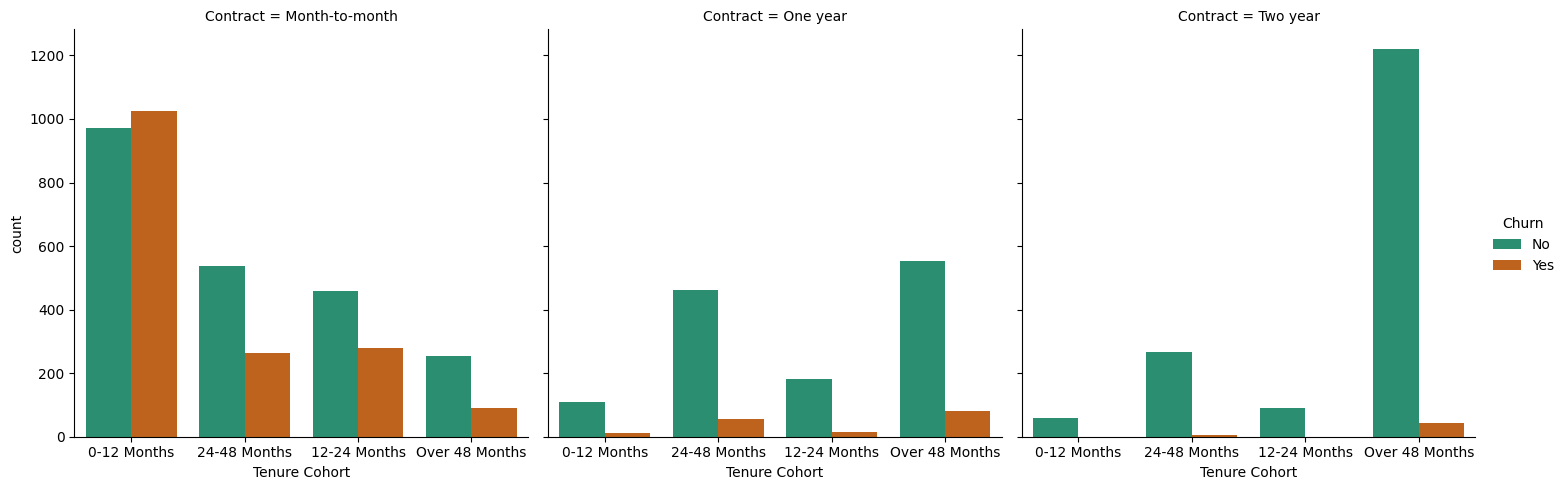

In [41]:
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',kind='count'
           ,col='Contract',palette='Dark2')

# Predictive Modeling

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [43]:
# we don't need Customer Id while prediction
X = df.drop(['Churn','customerID'],axis=1)

In [44]:
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=101)

### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier()

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(1,5)
}

In [51]:
grid_dt_model = GridSearchCV(dt,param_grid,cv=5,verbose=1)

In [52]:
grid_dt_model.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _val

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [53]:
grid_dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [54]:
dt_pred = grid_dt_model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [56]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



In [57]:
grid_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=3)

In [58]:
grid_dt_model.best_score_

0.7896661234225627

In [59]:
confusion_matrix(y_test,dt_pred)

array([[497,  60],
       [ 83,  64]])

### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier()

In [62]:
param_grid = {'n_estimators':[15,30,45,60,75,90,100,125,150],
             'max_depth':[1,5,10,20],
             'min_samples_split':[2,5,10],
             'max_features':['sqrt','log2']
             }

In [63]:
grid_rf_model = GridSearchCV(rf,param_grid,cv=5)

In [64]:
grid_rf_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [15, 30, 45, 60, 75, 90, 100, 125,
                                          150]})

In [65]:
rf_pred = grid_rf_model.predict(X_test)

In [66]:
grid_rf_model.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 10,
 'n_estimators': 100}

In [67]:
grid_rf_model.best_score_

0.8004113669145607

In [68]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.64      0.54      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.73      0.74       704
weighted avg       0.83      0.84      0.83       704



### Ada Boost Classifier

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
ad = AdaBoostClassifier()

In [71]:
param_grid={
    'n_estimators':[12,25,50,100,150,200]
}

In [72]:
grid_ad_model = GridSearchCV(ad,param_grid,cv=5,scoring='accuracy')

In [73]:
grid_ad_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [12, 25, 50, 100, 150, 200]},
             scoring='accuracy')

In [74]:
grid_ad_model.best_params_

{'n_estimators': 25}

In [75]:
grid_ad_model.best_score_

0.8049942241287802

In [76]:
ad_pred = grid_ad_model.predict(X_test)

In [77]:
print(classification_report(y_test,ad_pred))

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.52      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



### Gradient Boosting


In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
gd = GradientBoostingClassifier(n_estimators=100,max_depth=6,min_samples_split=3,
                               min_samples_leaf=5,max_features='sqrt')


In [80]:
gd.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=5,
                           min_samples_split=3)

In [81]:
gd_pred = gd.predict(X_test)

In [82]:
print(classification_report(y_test,gd_pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.54      0.49      0.51       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



In [83]:
confusion_matrix(y_test,gd_pred)

array([[496,  61],
       [ 75,  72]])